## Import Library

In [1]:
# Import Library yang diperlukan yaitu Pandas & Numpy
import pandas as pd
import numpy as np

## Import Dataset

In [2]:
df = pd.read_csv('ab_data.csv')

## Quick Look

In [3]:
# Menampilkan 5 data teratas
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# Mengetahui jumlah baris dan kolom (baris, kolom/variabel)
df.shape

(294478, 5)

Jumlah baris: 294478
Jumlah kolom: 5

### Sample Size using Slovin

Untuk menentukan jumlah sampel yang diperlukan dapat menggunakan rumus Slovin.

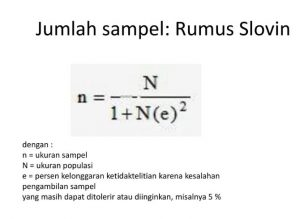

In [5]:
# Slovin = jumlah data / (1 + jumlah data * eror yang ditolerir atau diinginkan ** 2)
slovin = 294478 / (1 + 294478 * 0.05 ** 2)

In [6]:
slovin

399.45740272248173

Berdasarkan rumus slovin, kita dapat mengambil 399.457 atau dibulatkan menjadi 400, yang mana merupakan observasi untuk dijadikan data sampel.

### Sample 400 observation

In [7]:
# Berdasarkan rumus Slovin dibutuhkan 400 observasi sebagai sample

# Mengambil 400 observasi sebagai sampel dari data df
df.sample(n = 400)

# Maka akan muncul 400 data yang dipilih secara acak

,user_id,timestamp,group,landing_page,converted
283980,672033,2017-01-13 09:43:51.229980,treatment,new_page,0
250685,642364,2017-01-11 17:57:48.618139,control,old_page,0
9934,919899,2017-01-05 22:45:23.112407,control,old_page,0
147025,896794,2017-01-05 15:15:26.254686,treatment,new_page,0
291212,640195,2017-01-18 14:48:58.121589,treatment,new_page,0
...,...,...,...,...,...
185697,740963,2017-01-04 12:33:31.695644,control,old_page,0
18248,869474,2017-01-17 09:33:26.105908,control,old_page,0
95923,680169,2017-01-04 02:13:24.529442,treatment,new_page,0
168077,747861,2017-01-12 07:23:41.395772,control,old_page,1


### Sample using Same Randomness

In [8]:
# Jika ingin menentukan bilangan random, agar satu dengan yang lain dapat menghasilkan bilangan acak yang sama
# dapat menggunakan random_state
df.sample(n=400,random_state=123)

,user_id,timestamp,group,landing_page,converted
260162,847857,2017-01-18 15:15:02.551941,control,old_page,0
37456,920163,2017-01-10 20:42:09.498343,control,old_page,0
80272,806917,2017-01-06 12:05:56.049996,control,old_page,0
278131,662772,2017-01-08 04:36:26.397852,control,old_page,0
270691,911648,2017-01-08 17:21:28.253382,control,old_page,0
...,...,...,...,...,...
13569,907619,2017-01-03 12:59:47.875206,treatment,new_page,0
89687,784615,2017-01-07 04:37:03.942657,control,old_page,0
3842,706821,2017-01-07 06:05:52.261403,treatment,new_page,0
89187,689612,2017-01-09 18:03:49.801956,control,old_page,0


### Sample 30% from dataset

In [9]:
# Kita juga dapat memilih sample tanpa harus menggunakan slovin

# Hal tersebut dapat dilakukan dengan menggunakan frac
# Contoh di bawah, kita ingin mengambil sampel yaitu 30% dari data atau populasi yang ada
df.sample(frac = 0.3)

,user_id,timestamp,group,landing_page,converted
91416,703919,2017-01-04 04:34:20.195695,control,old_page,0
284206,892367,2017-01-11 14:21:19.921124,treatment,new_page,0
59912,755938,2017-01-22 19:12:36.240621,control,old_page,0
154344,802827,2017-01-22 05:53:02.925972,control,old_page,1
287922,769127,2017-01-20 08:02:53.147898,control,old_page,0
...,...,...,...,...,...
259613,903699,2017-01-23 04:53:00.712371,treatment,new_page,0
281870,943223,2017-01-15 23:41:52.925813,control,old_page,0
13178,763719,2017-01-08 01:21:48.216269,control,old_page,0
210735,787285,2017-01-14 13:18:03.457887,treatment,new_page,0


# Sampling for Each Group

Jika ingin melakukan sampling di masing-masing group, dapat digunakanan group by.

In [10]:
# Group by untuk mengelompokan data, dalam contoh terdapat dua group yaitu control dan treatment

# Size untuk melihat jumlah data dari masing-masing group
df.groupby(['group'], as_index = True).size()

group
control      147202
treatment    147276
dtype: int64

Jumlah data dari group control: 147202
Jumlah data dari group treatment: 147276

In [11]:
# Kemudian kita apply, yang mana apply berfungsi untuk mengaplikasikan sebuah fungsi kedalam group yang telah kita buat

# Fungsi yang digunakan bisa didapat dari documentation python atau membuat fungsi sendiri

# Ketika apply harus menggunakan lambda

# Karena kita butuh 400 observasi sebagai sampel

# Maka dari masing-masing group kita ambil 200 sample

# random_state = 123 untuk mengambil data secara acak dan sama dari masing-masing group

df.groupby(['group'], as_index = True).apply(lambda x: x.sample(n = 200, random_state = 123))

user_id                   timestamp      group landing_page  \
group                                                                           
control   95574    704344  2017-01-08 06:33:15.620318    control     old_page   
          282637   903218  2017-01-07 16:40:31.904242    control     old_page   
          201262   724634  2017-01-05 18:38:31.257679    control     old_page   
          93315    750623  2017-01-21 19:20:32.814948    control     old_page   
          16163    651056  2017-01-04 03:17:39.846424    control     old_page   
...                   ...                         ...        ...          ...   
treatment 16034    665227  2017-01-18 06:10:37.832101  treatment     new_page   
          241972   818984  2017-01-23 01:45:24.506789  treatment     new_page   
          135298   843757  2017-01-04 03:10:19.433517  treatment     new_page   
          200501   659763  2017-01-24 13:21:56.026713  treatment     new_page   
          158648   788418  2017-01-14 05:09:32.246838  treatment     new_page   

                  converted  
group                        
control   95574           0  
          282637          0  
          201262          0  
          93315           0  
          16163           0  
...                     ...  
treatment 16034           1  
          241972          0  
          135298          0  
          200501          0  
          158648          0  

[400 rows x 5 columns]